In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [6]:
m2Df = pd.read_csv('M2SL.csv')
# Once M2 exceed 16000 clear another linear trends takes over
m2Df = m2Df.drop(m2Df[m2Df.M2SL >= 16000].index)

spDf = pd.read_csv('SP500.csv')
spDf = spDf.drop(spDf[spDf.SP500 == '.'].index)
data = pd.merge(m2Df, spDf, on="DATE", how="inner")
data["SP500"]=data["SP500"].astype(float)
#var = data.iloc[0]
#m2 = var["M2SL"]
#sp = var["SP500"]
#type(m2)
#type(sp)""
data.head(5)
data.value_counts()

DATE        M2SL     SP500  
2012-03-01  9837.1   1374.09    1
2018-02-01  13914.3  2821.98    1
2016-08-01  12968.2  2170.84    1
2016-09-01  13027.4  2170.86    1
2016-11-01  13174.1  2111.72    1
2016-12-01  13214.2  2191.08    1
2017-02-01  13359.2  2279.55    1
2017-03-01  13428.6  2395.96    1
2017-05-01  13537.3  2388.33    1
2017-06-01  13564.7  2430.06    1
2017-08-01  13671.4  2476.35    1
2017-09-01  13714.4  2476.55    1
2017-11-01  13802.4  2579.36    1
2017-12-01  13854.8  2642.22    1
2018-03-01  13971.0  2677.67    1
2016-06-01  12830.6  2099.33    1
2018-05-01  14065.7  2654.80    1
2018-06-01  14125.6  2734.62    1
2018-08-01  14198.1  2813.36    1
2018-10-01  14236.2  2924.59    1
2018-11-01  14255.3  2740.37    1
2019-02-01  14486.2  2706.53    1
2019-03-01  14533.4  2803.69    1
2019-04-01  14568.6  2867.19    1
2019-05-01  14668.1  2923.73    1
2019-07-01  14857.6  2964.33    1
2019-08-01  14934.8  2953.56    1
2019-10-01  15152.8  2940.25    1
2016-07-01  12889.1

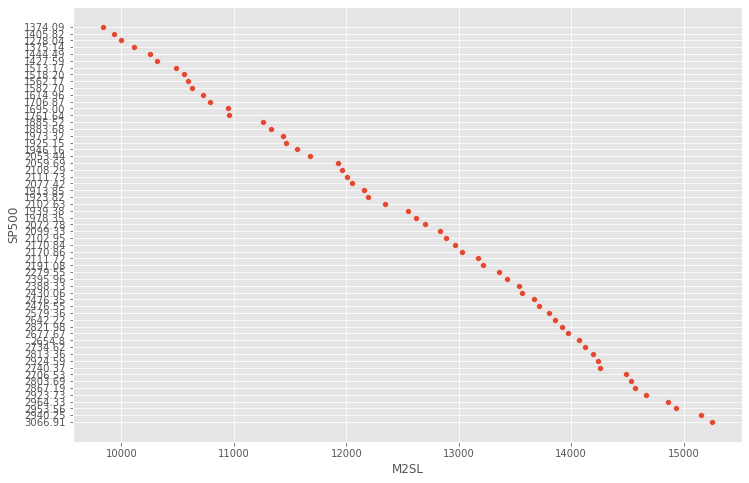

In [89]:
#ax.tick_params(axis='y', which = 'major', pad=20)
ax = sns.scatterplot(x="M2SL",y="SP500", data = data)

In [128]:
data_list = data.values.tolist()
x = data_list[0][0]

meanX = data["M2SL"].mean()
meanY = data["SP500"].mean()
top = 1
for pt in data_list:
    top = top + ((pt[1]-meanX)*(pt[2]-meanY))
    
bottom=1
for pt in data_list:
    bottom += ((pt[1]-meanX)**2)
slope = top/bottom
print(slope)
intercept = meanY-slope*meanX
print(intercept)

0.3111428332450738
-1735.9586778228163


C:\Users\banping\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'SP500')

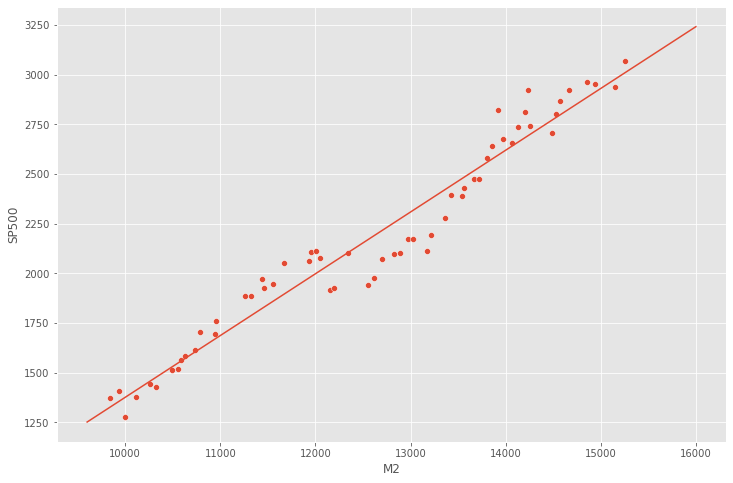

In [139]:
sns.scatterplot(x="M2SL", y="SP500", data= data)
x_value = [x for x in range(9600, 16000)]
y_value = [(slope*x + intercept) for x in x_value] 
sns.lineplot(x_value, y_value)

plt.xlabel("M2")
plt.ylabel("SP500")